_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 05 - Wirtschaftswissenschaften: Daten finden, einlesen und mit Histogrammen visualisieren

<a name="top"></a>Inhalt
---
* [Daten beschaffen](#daten_beschaffen)
* [Daten erkunden](#daten_erkunden)
* [Histogramme](#histogramme)  

<a name="daten_beschaffen"></a>1. Daten beschaffen
---
**1.A** Die Datensätze stammen aus einer Datenbank, die historische Datensätze aus den Wirtschafts- Politik- und Sozialwissenschaften zusammenstellt, kuratiert und veröffentlicht. Beispiele sind Datensätze zu
* Landwirtschaft
* Demographie
* Geschlechtergerechtigkeit
* Produktion
* Arbeit (die wir in dieser Übung verwenden)  

Die hier verwendeten Daten zur Arbeit wurden von Sjaak van der Velden vom [International Institute of Social History](https://iisg.amsterdam/en) zusammengestellt. Als Quellen der Daten werden angegeben:
* ILO Yearbook of Labour Statistics 1935-1989 (1927-1989)
* http://laborsta.ilo.org/ (1969-2008)
* http://www.ilo.org/ilostat/faces/home/ (1969-2013)

In [23]:
%matplotlib inline

In [24]:
# 1.B
# um die Tabellen in DataFrames zu speichern, importieren wir
# die Bibliothek Pandas
import pandas as pd

# um Pfade zu Dateien in unserem System besser managen zu können,
# importieren wir die Funktion join() der Bibliothek os.path
# "join" fügt Teile eines Pfades zusammen und benutzt dabei den
# richtigen Trenner (back-slash unter Windows, forward-slash
# unter Unix. Das ist praktisch, weil man sosnt die Pfad-Namen auf
# jedem Betriebssystem umschreiben müsste
from os.path import join

fname_streiks = 'NumberofLabourDisputes_Broad.xlsx'
fname_arbeiter = 'NumberofWorkersInvolvedinLabourDisputes_Broad.xlsx'
fname_tage = 'NumberofDaysLostinLabourDisputes_Broad.xlsx'

streiks = pd.read_excel(join("daten/", fname_streiks))
arbeiter = pd.read_excel(join("daten/", fname_arbeiter))
tage = pd.read_excel(join("daten/", fname_tage))

streiks.head()

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 1.C
spalten = streiks.columns
print(spalten)

Index(['ccode', 'country name', '1500', '1501', '1502', '1503', '1504', '1505',
       '1506', '1507',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=518)


* Die erste Spalte ```ccode``` enthält eine Ganzzahl, der den [Ländercode](https://en.wikipedia.org/wiki/ISO_3166-1) darstellt. 
* Die zweite Spalte ```country name``` enhält den Namen des Landes als String. 
* Alle weiteren Spalten enthalten die anzahl der Streiks in einem bestimmten Jahr.

[Anfang](#top)

<a name="daten_beschaffen"></a>2. Daten erkunden
---

In [26]:
# 2.A
print('Zeile mit Index 0')
print(streiks.loc[0])
print()
print('Zeile mit Index 100')
print(streiks.loc[100])
print()
print('Letzte Zeile')
print(streiks.loc[len(streiks) - 1])

Zeile mit Index 0
ccode                     4
country name    Afghanistan
1500                    NaN
1501                    NaN
1502                    NaN
                   ...     
2011                    NaN
2012                    NaN
2013                    NaN
2014                    NaN
2015                    NaN
Name: 0, Length: 518, dtype: object

Zeile mit Index 100
ccode                 807
country name    Macedonia
1500                  NaN
1501                  NaN
1502                  NaN
                  ...    
2011                  NaN
2012                  NaN
2013                  NaN
2014                  NaN
2015                  NaN
Name: 100, Length: 518, dtype: object

Letzte Zeile
ccode                716
country name    Zimbabwe
1500                 NaN
1501                 NaN
1502                 NaN
                  ...   
2011                 NaN
2012                 NaN
2013                 NaN
2014                 NaN
2015                 NaN
Name

In [27]:
# 2.B
# alle spalten bis auf die ersten beiden enthalten Jahreszahlen
zeit = spalten[2:]

# der Start des im Datensatz enthaltenen Zeitraums ist der erste
# Eintrag in der Liste mit den Zeiten, der Endzeitpunkt der letzte
# Eintrag
print('Startzeitpunkt: {} \nEndzeitpunkt: {}'\
     .format(zeit[0], zeit[-1]))

Startzeitpunkt: 1500 
Endzeitpunkt: 2015


In [28]:
# 2.C Duplikat-Suche
# alle einzigartigen Einträge in der Spalte "country name"
laender = streiks['country name'].unique()
print('Der Streik-Datensatz enthält Einträge für {} verschiedene Länder'\
     .format(len(laender)))

# die Länge (also Anzahl der Zeilen) im Datensatz
anzahl_zeilen = len(streiks)
print('Der Datensatz enthält {} Einträge'.format(anzahl_zeilen))

# es muss also drei Einträge geben, die Duplikate sind!

# um die Duplikate zu finden, benutzen wir die Funktion "duplicated()",
# die das DataFrame mitliefert. Die Funktion gibt eine Maske (also eine
# Liste von "True" und "False" Werten) zurück, die die Duplikate im
# DataFrame markiert
maske_duplikate = streiks.duplicated(subset='country name',keep=False)

# die Duplikate können wir nun finden, indem wir mit dieser Maske filtern
duplikate = streiks[maske_duplikate]
duplikate.head(10)

Der Streik-Datensatz enthält Einträge für 195 verschiedene Länder
Der Datensatz enthält 198 Einträge


,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
30,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,124.0,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,151.0,206.0,187.0,NaN,NaN,148.0,282.0,NaN,NaN,NaN
116,NaN,Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,504.0,Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,729.0,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 2.D Duplikat-Analyse

# Anzahl aller Einträge in einer Zeile
data_points = len(streiks.columns)

# aus Aufgabe 2.B entnehmen wir, dass die Duplikate an den Indices
# 30, 31 sowie 116, 117 und 165, 166 im DataFrame stehen

# Kanada
# errechne die Anzahl der Datenpunkte in Zeile 30
kanaca1_data = data_points - streiks.loc[30].isna().sum()
# errechne die Anzahl der Datenpunkte in Zeile 31
kanaca2_data = data_points - streiks.loc[31].isna().sum()
print('Der erste Eintrag für Kanada enthält {} Datenpunkt(e).'.format(kanaca1_data))
print('Der zweite Eintrag für Kanada enthält {} Datenpunkt(e).'.format(kanaca2_data))

# Marokko
print() # Leerzeile
marokko1_data = data_points - streiks.loc[116].isna().sum()
marokko2_data = data_points - streiks.loc[117].isna().sum()
print('Der erste Eintrag für Marokko enthält {} Datenpunkt(e).'.format(marokko1_data))
print('Der zweite Eintrag für Marokko enthält {} Datenpunkt(e).'.format(marokko2_data))

# Sudan
print() # Leerzeile
sudan1_data = data_points - streiks.loc[165].isna().sum()
sudan2_data = data_points - streiks.loc[166].isna().sum()
print('Der erste Eintrag für Sudan enthält {} Datenpunkt(e).'.format(sudan1_data))
print('Der zweite Eintrag für Sudan enthält {} Datenpunkt(e).'.format(sudan2_data))

# der zweite Eintrag scheint jeweils verlässlicher zu sein, da der erste
# Eintrag außer dem Landesnamen keine Information enthält

# entferne die Zeile mit Index 30, 116 und 166 aus dem DataFrame
# im Folgenden arbeiten wir mit dem so bereinigten DataFrame weiter
streiks_clean = streiks.drop([30, 116, 166])
print()
print('Einträge im gesäuberten DataFrame: {}'.format(len(streiks_clean)))
print('Entfernte Einträge: {}'.format(len(streiks) - len(streiks_clean)))

Der erste Eintrag für Kanada enthält 1 Datenpunkt(e).
Der zweite Eintrag für Kanada enthält 86 Datenpunkt(e).

Der erste Eintrag für Marokko enthält 1 Datenpunkt(e).
Der zweite Eintrag für Marokko enthält 51 Datenpunkt(e).

Der erste Eintrag für Sudan enthält 1 Datenpunkt(e).
Der zweite Eintrag für Sudan enthält 2 Datenpunkt(e).

Einträge im gesäuberten DataFrame: 195
Entfernte Einträge: 3


In [30]:
# 2.E
# Anzahl aller Einträge in einer Zeile
data_points = len(streiks_clean.columns)

# leere Liste zum Speichern der Einträge pro Land
eintraege = []

# iteriere über alle Zeilen des DataFrame
# WICHTIG: da wir in Aufgabe 2.D das originale DataFrame
# gefiltert und die Zeilen mit den Indices 30, 116 und 166
# hinausgeworfen haben, ist der Zeilenindex nicht mehr 
# durchgängig, d.h. im DataFrame streiks_clean fehlen die
# Indices 30, 116 und 166. Um Probleme bei der Iteration zu
# vermeiden, verwenden wir die Funktion iterrows(), da diese
# automatisch nur existierende Indices zurückliefert.
for index, row in streiks_clean.iterrows():
    leer = streiks_clean.loc[index].isna().sum()
    eintraege.append(data_points - leer)

# erstelle ein neues DataFrame mit zwei Spalten:
# dem Landesnamen "country name" und der Anzahl an
# Datenpunkten für jedes Land "data points"
laender_eintraege = pd.DataFrame({'country name': streiks_clean['country name'],\
                                 'data points': eintraege})
# zeite die ersten paar Einträge des neuen DataFrames an
laender_eintraege.head()

,country name,data points
0,Afghanistan,2
1,Albania,2
2,Algeria,26
3,Andorra,2
4,Angola,2


In [31]:
# 2.F
### Maximum
# was ist die maximale Anzahl der Einträge für ein Land?

# berechne das Maximum in der Spalte "data points"
max_info = laender_eintraege['data points'].max()
print('Die maximale Anzahl an Einträgen für ein Land ist {}.'.\
     format(max_info))

# finde den Index des Landes (oder der Länder)
# mit den meisten Einträgen:

# erstelle einen Filter, der die Länder mit der maximalen
# Anzahl an Einträgen herausfiltert
filter_max = laender_eintraege['data points'] == max_info
# wende den Filter an
max_info_land = laender_eintraege[filter_max]
# diese Länder haben alle 89 Einträge
print('Die folgenden Länder haben die maximale Anzahl an Einträgen:')
print(max_info_land)

### Minimum
print()
# was ist die minimale Anzahl der Einträge für ein Land?

# berechne das Minimum in der Spalte "data points"
min_info = laender_eintraege['data points'].min()
print('Die minimale Anzahl an Einträgen für ein Land ist {}.'.\
     format(min_info))

# finde den Index des Landes (oder der Länder)
# mit den wenigsten Einträgen:

# erstelle einen Filter, der die Länder mit der minimalen
# Anzahl an Einträgen herausfiltert
filter_min = laender_eintraege['data points'] == min_info
# wende den Filter an
min_info_land = laender_eintraege[filter_min]
# diese Länder haben alle nur einen Eintrag
print('Die folgenden Länder haben die minimale Anzahl an Einträgen:')
print(min_info_land)

Die maximale Anzahl an Einträgen für ein Land ist 89.
Die folgenden Länder haben die maximale Anzahl an Einträgen:
       country name  data points
47          Denmark           89
157    South Africa           89
169          Sweden           89
170     Switzerland           89
188  United Kingdom           89
189   United States           89

Die minimale Anzahl an Einträgen für ein Land ist 1.
Die folgenden Länder haben die minimale Anzahl an Einträgen:
    country name  data points
88        Kosovo            1
165        Sudan            1


In [32]:
# 2.G
# Anzahl aller Einträge in einer Spalte
data_points = len(streiks_clean)

# Spalten mit Jahreszahlen
zeiten = list(streiks_clean.columns[2:])

# leere Liste zum Speichern der Einträge pro Jahr
eintraege = []

# iteriere über alle Spalten des DataFrame, die eine
# Jahreszahl enthalten
for jahr in zeiten:
    leer = streiks_clean[jahr].isna().sum()
    eintraege.append(data_points - leer)

# erstelle ein neues DataFrame mit zwei Spalten:
# dem Jahr "year" und der Anzahl an
# Datenpunkten für jedes Jahr "data points"
jahre_eintraege = pd.DataFrame({'year': zeiten,\
                                 'data points': eintraege})
# zeige die ersten paar Einträge des neuen DataFrames an
jahre_eintraege.head()

# die Einträge in der Spalte "Jahr" sind jetzt noch Strings,
# da sie original Spaltennamen waren
# Jahreszahlen sind aber Ganzzahlen, und als solche auch 
# wesentlich einfacher zu handhaben. Deswegen konvertieren
# wir die Einträge in der Spalte "yera" noch zu Ganzzahlen
# (also "integer"), indem wir die Funktion "astype()" des 
# DataFrames verwenden:
jahre_eintraege['year'] = jahre_eintraege['year'].astype(int)

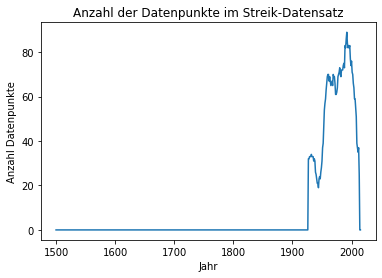

In [33]:
# 2.H
# importiere die Bibliothek matplotlib.pyplot unter
# dem Kürzel "plt"
import matplotlib.pyplot as plt
# mit diesem Kommando teilen wir dem Jupyter-Notebook mit,
# dass es Grafiken direkt im Notebook anzeigen soll
%matplotlib inline

# erstelle eine einfache Visualisierung (lineplot) der Anzahl
# an Datenpunkten über die Jahre
plt.plot(jahre_eintraege['year'], jahre_eintraege['data points'])
plt.ylabel('Anzahl Datenpunkte')
plt.xlabel('Jahr')
plt.title('Anzahl der Datenpunkte im Streik-Datensatz');

**Trends:** 
* Es ist ein offensichtlich, dass Daten zu Streiks erst in der jüngeren Geschichte, also ab etwa 1910 verfügbar sind. Die Jahre vor 1910 beinhalten praktisch keine Datenpunkte. 
* Um den zweiten Weltkrieg herum, gibt es einen kleinen Einbruch in der Verfügbarkeit der Daten.
* In der zweiten Hälfte des 20. Jahrhunderts ist die Datenlage relativ gut. Allerdings haben zu keinem Zeitpunkt mehr als 90 Länder gleichzeitig einen Eintrag (das ist weniger als die Hälfte der 195 Länder im Datensatz).
* Ab 2010 bricht die Datenverfügbarkeit wieder ein. Dies könnte damit erklärt werden, dass die Daten zwar verfügbar sind, aber noch nicht in diesem Datensatz aggregiert werden konnten.

In [34]:
# 2.I
# Um die Visualisierung etwas übersichtlicher zu halten, beschränken wir 
# uns auf die 20 Länder mit den meisten Einträgen. Dazu sortieren wir das
# DataFrame in absteigender Reihenfolge nach dem Wert in der Spalte "data points"
sortiert = laender_eintraege.sort_values(by=['data points'],ascending=False)[0:20]
sortiert

,country name,data points
188,United Kingdom,89
189,United States,89
47,Denmark,89
157,South Africa,89
170,Switzerland,89
169,Sweden,89
80,Israel,88
124,New Zealand,88
31,Canada,86
59,Finland,86


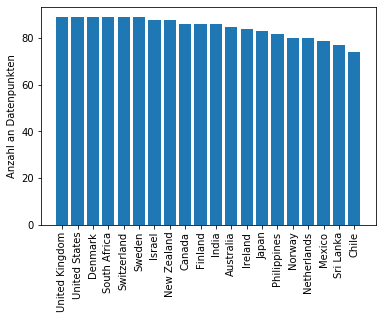

In [35]:
# nun erstellen wir ein bar-chart
plt.bar(sortiert['country name'], sortiert['data points'])
plt.ylabel('Anzahl an Datenpunkten')
# um die Beschriftung der einelnen Balken besser lesbar zu machen,
# rotieren wir die Beschriftungen um 90 Grad
plt.xticks(rotation='vertical');

**2.J** Jahreszahlen sind Zahlen und damit natürlich sortierbar (das Jahr 1991 folgt auf das Jahr 1990). Damit eignet sich eine zweidimensionale Darstellung der Beobachtung "Einträge" über einer Variablen (Zeit).  
Ländernamen hingegen kategorische Variablen - jedes Land ist seine eigene Kategorie. Die Kategorien lassen sich nicht natürlich sortieren, deswegen eignet sich eine eindimensionale Darstellung der Beobachtung "Einträge" in jeder Kategorie.

[Anfang](#top)

<a name="daten_beschaffen"></a>3. Histogramme
---

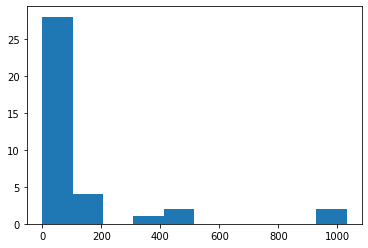

In [36]:
# 3.A
# importiere das Untermodul pyplot aus der Bibliothek
# matplotlib zum darstellen von Grafiken
import matplotlib.pyplot as plt
# mit diesem Kommando teilen wir dem Jupyter-Notebook mit,
# dass es Grafiken direkt im Notebook anzeigen soll
%matplotlib inline

# erstelle ein einfaches Histogram der Streiks im Jahr 2010
plt.hist(streiks_clean['2010'].dropna());

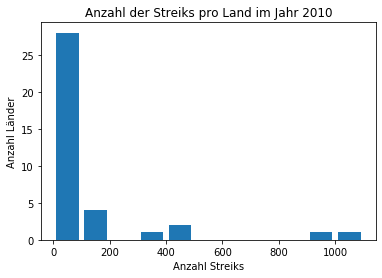

In [37]:
# 3.Ba
# die Werte liegen alle in einem Bereich von 0 bis 1100 Streiks
# indem wir die "range" entsprechend festlegen und die Anzahl der Bins
# auf 11 setzen, liegen die einzelnen Bins zwischen "glatten" Vielfachen
# von 100. Das ist anschaulich in einfach zu interpretieren. Diese 
# Darstellung lässt z.B. direkt ablesen, dass in den meisten Ländern zwischen
# 0 und 100 Streiks stattgefunden haben. Allerdings geht auch viel Information
# über den Bereich mit wenigen Streiks (0-100) verloren, da hier alle
# Länder in einen einzigen bin aggregiert werden

# die rwidth auf einen Wert kleiner 1.0 zu setzen ist auch eine gute Idee,
# da es die einzelen bins in der Darstellung besser voneinander abgrenzt.

# Histogram
plt.hist(streiks_clean['2010'].dropna(), range=[0,1100], bins=11, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010');

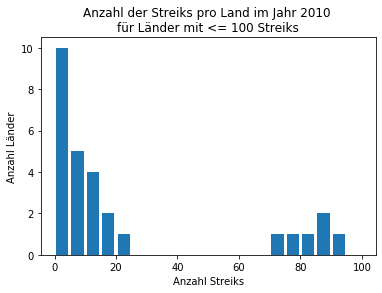

In [38]:
# 3.Bb
# um den Bereich zwischen 0 und 100 genauer zu betrachten, setzen wir die
# range entsprechend und schrauben die Anzahl der bins nach oben:

# Histogram
plt.hist(streiks_clean['2010'].dropna(), range=[0,100], bins=20, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010 \nfür Länder mit <= 100 Streiks');

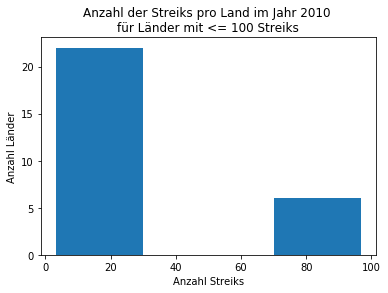

In [39]:
# 3.C wenige bins
# hier geht (wie schon oben beschrieben) viel Information verloren

# Histogram
plt.hist(streiks_clean['2010'].dropna(), range=[0,100], bins=3, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010 \nfür Länder mit <= 100 Streiks');

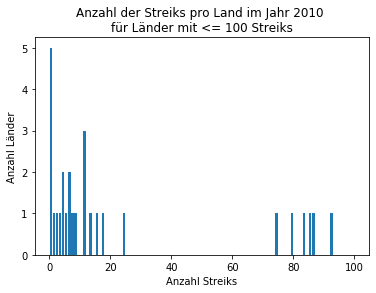

In [40]:
# 3.C viele bins
# hier geht der Vorteil der Aggregierten Information verloren und es
# ist schwierig, aus der Darstellung allgemeinere Erkenntnisse zu extrahieren

# Histogram
plt.hist(streiks_clean['2010'].dropna(), range=[0,100], bins=100, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010 \nfür Länder mit <= 100 Streiks');

# ein guter Wert für den Bereich 0-100 Streiks ist (wie in 3.B) z.B. bins=20

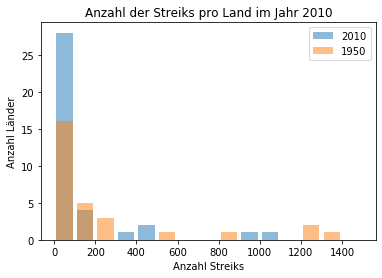

In [41]:
# 3.D
# im Jahr 1950 gab es einige Länder mit einer deutlich höheren Anzahl
# an Streiks. Entsprechend müssen wir die range des Histograms anpassen.

# Um die beiden plots zu vergleichen ist es hilfreich, range und bins
# jeweils gleich zu wählen.

# Um die Lesbarkeit der Visualisierung zu verbesern, setzen wir den
# alpha-wert (Durchsichtigkeit) der Balken auf 50% - da sonst die
# größeren Balken die dahinterliegenden Balken verdecken

# HINWEIS: mit dem Argument "label" weisen wir jedem der beiden
# Histogramme einen "Namen" zu, der später in der Legende aufscheint

# Histogramm der Streiks im Jahr 2010
plt.hist(streiks_clean['2010'].dropna(), range=[0,1500], bins=15, rwidth=0.8, \
         alpha=0.5, label='2010')

# Histogram der Streiks im Jahr 1950
plt.hist(streiks_clean['1950'].dropna(), range=[0,1500], bins=15, rwidth=0.8, \
         alpha=0.5, label='1950')

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010')

# Legende
plt.legend();

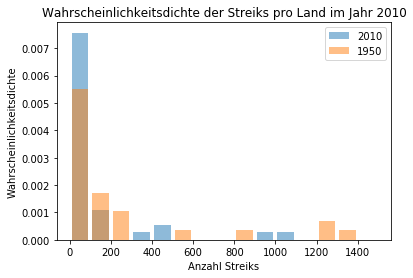

In [42]:
# 3.E (density)
# das Argument "density" verändert die Darstellung der Beobachtungen auf der y-Achse. 
# Vorher war die absolute Anzahl der Beobachtungen abgebildet, mit density=True
# wird die normierte Anzahl der beobachtungen abgebildet, die als Wahrscheinlichkeits-
# dichte interpretiert werden kann
plt.hist(streiks_clean['2010'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='2010', density=True)
plt.hist(streiks_clean['1950'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='1950', density=True)
plt.xlabel('Anzahl Streiks')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Wahrscheinlichkeitsdichte der Streiks pro Land im Jahr 2010')
plt.legend()

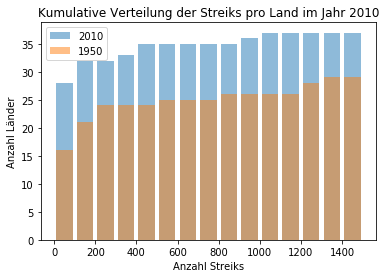

In [43]:
# 3.E (cumulative)
# wenn cumulative=True, dann zeigt jeder bin nicht nur die Anzahl der Beobachtungen
# in ebendiesem bin sondern die Anzahl in dem bin PLUS die Anzahl der Beobachtungen
# in allen Vorangegangenen bins. Die Anzahl der Beobachtungen im letzten Bin entspricht
# also immer der Gesamtanzahl der Beobachtungen.
plt.hist(streiks_clean['2010'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='2010', cumulative=True)
plt.hist(streiks_clean['1950'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='1950', cumulative=True)
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Kumulative Verteilung der Streiks pro Land im Jahr 2010')
plt.legend()

# wir können ablesen, dass im Jahr 1950 zwar mehr länder eine Höhere
# Anzahl an Streiks hatten, insgesamt aber aus weniger Ländern Streiks
# gemeldet wurden. Da wir oben schon gesehen haben, dass die Datenlage
# insbesondere um den zweiten Weltkrieg herum nicht besonders gut ist,
# stellt sich die Frage, ob dieses Ergebnis der Realität entspricht oder
# der schlechten Datenlage geschuldet ist.

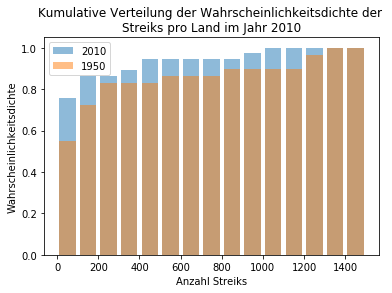

In [44]:
# 3.E (density & cumulative)
# ist sowohl density=True als auch cumulative=True, dann lässt sich schön beobachten,
# dass die Wahrscheinlichkeitsdichte auf 1 normiert ist, dass heißt die kumulierten 
# Wahrscheinlichkeiten, eine Beobachtung in einem Bin zu finden ist im letzten bin gleich 1
plt.hist(streiks_clean['2010'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='2010', cumulative=True, density=True)
plt.hist(streiks_clean['1950'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='1950', cumulative=True, density=True)
plt.xlabel('Anzahl Streiks')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Kumulative Verteilung der Wahrscheinlichkeitsdichte der \nStreiks pro Land im Jahr 2010')
plt.legend()

[Anfang](#top)